Loading the packages

In [ ]:
#pip install scikit-learn pandas matplotlib plotly nbformat ipython

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import nbformat
import IPython
import plotly.io as pio

In [11]:
iris = pd.read_csv('iris.csv')
print(iris.head())
print(iris.Species.unique())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
['setosa' 'versicolor' 'virginica']


In [7]:
iris_filtered = iris[iris['Species'].isin(['virginica', 'versicolor'])]

# Separate features (X) and labels (y)
X = iris_filtered.drop('Species', axis=1)
y = iris_filtered['Species']

E2: Use kNN with K=5 and a train-test-split of 70-30
Split the data into training and testing sets

Using the train_test_split function from sklearn to split the data into training and test sets
X is our feature matrix or our input variables here being the species column and y is our target variable   
We are splitting the data into 70% training and 30% test data
The random_state parameter is used to ensure that the data is split in the same way every time the code is run, popular value being 42, but it can be any value 

The value of k if too less will be overfitting, too less will be underfitting

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the kNN classifier with K=1
knn = KNeighborsClassifier(n_neighbors=11)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with K=1: {accuracy:.2f}")

Accuracy with K=1: 0.90


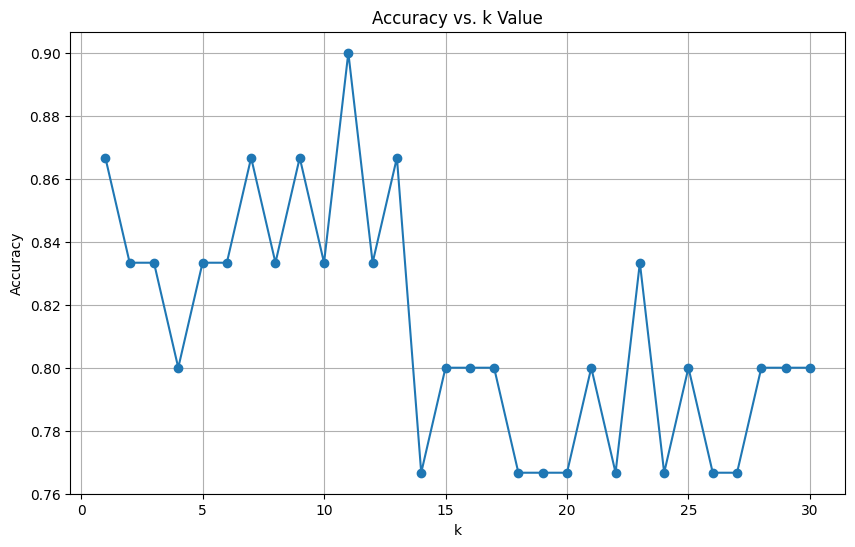

In [38]:
k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k Value')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

pio.renderers.default = 'browser'

# Create an interactive plot using Plotly
fig = go.Figure()

# Add a trace for the accuracy values
fig.add_trace(
    go.Scatter(
        x=list(k_values),
        y=accuracies,
        mode='lines+markers',
        name='Accuracy',
        line=dict(color='blue', width=2),
        marker=dict(size=8, color='red')
    )
)

# Update layout for better visualization
fig.update_layout(
    title='Accuracy vs. k Value',
    xaxis_title='k',
    yaxis_title='Accuracy',
    template='plotly_white',
    hovermode='x unified',
    showlegend=True
)

Explain the choice of a good k
The best k is the one that maximizes accuracy. 
From the plot, we can choose the k with the highest accuracy.

In [10]:
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k value: {best_k} with accuracy: {max(accuracies):.2f}")

Best k value: 11 with accuracy: 0.90


In [12]:
# In this case, we are using the default Euclidean distance, but for thoroughness, one could test other distance metrics:
# Example: Using Minkowski distance with p=3
knn_minkowski = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=3)
knn_minkowski.fit(X_train, y_train)
y_pred_minkowski = knn_minkowski.predict(X_test)
accuracy_minkowski = accuracy_score(y_test, y_pred_minkowski)
print(f'Accuracy with Minkowski distance: {accuracy_minkowski:.4f}')

Accuracy with Minkowski distance: 0.9000
